In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('standard_curve.csv')
df.index = ['A', 'B', 'C']
df.columns = ['0', '2', '4', '6', '8', '10']
df

,0,2,4,6,8,10
A,0.065,0.210,0.295,0.326,0.385,0.354
B,0.048,0.174,0.315,0.340,0.365,0.373
C,0.040,0.157,0.264,0.355,0.354,0.357


In [4]:
df_avg = pd.DataFrame(df.mean(axis=0)).T
df_avg.index = ['avg']
df_avg

,0,2,4,6,8,10
avg,0.051,0.180333,0.291333,0.340333,0.368,0.361333


* marked for result

In [5]:
df_merged = pd.concat([df, df_avg])
df_merged

,0,2,4,6,8,10
A,0.065,0.210000,0.295000,0.326000,0.385,0.354000
B,0.048,0.174000,0.315000,0.340000,0.365,0.373000
C,0.040,0.157000,0.264000,0.355000,0.354,0.357000
avg,0.051,0.180333,0.291333,0.340333,0.368,0.361333


# make standard curve

In [94]:
df_avg

,0,2,4,6,8,10
avg,0.051,0.180333,0.291333,0.340333,0.368,0.361333


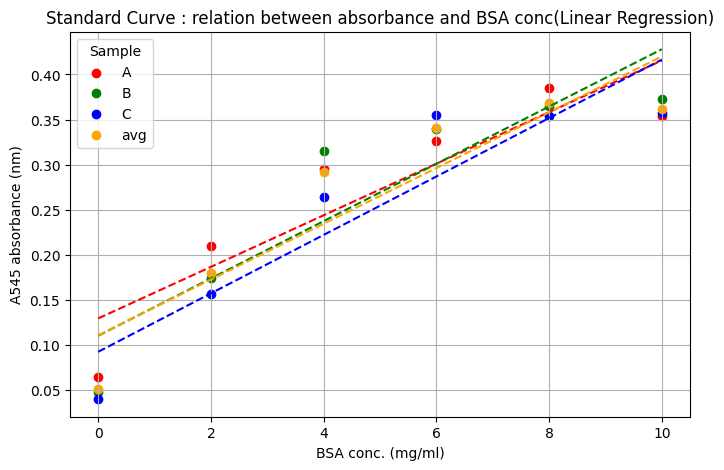

In [7]:
# Prepare data for linear regression
x = df.columns.astype(float)  # BSA concentrations (mg/ml)
colors = ['red', 'green', 'blue', 'orange']
labels = ['A', 'B', 'C', 'avg']

plt.figure(figsize=(8, 5))

for i, row in enumerate(['A', 'B', 'C', 'avg']):
    y = df_merged.loc[row].values.astype(float)  # A545 absorbance
    plt.scatter(x, y, color=colors[i], label=labels[i])
    # Linear regression for each row
    coef = np.polyfit(x, y, 1)
    y_fit = np.polyval(coef, x)
    plt.plot(x, y_fit, color=colors[i], linestyle='--')

plt.xlabel('BSA conc. (mg/ml)')
plt.ylabel('A545 absorbance (nm)')
plt.title('Standard Curve : relation between absorbance and BSA conc(Linear Regression)')
plt.legend(title='Sample')
plt.grid(True)
plt.show()

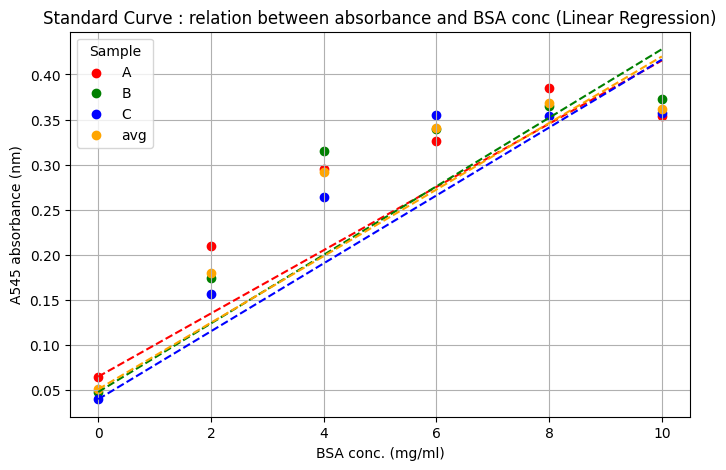

In [50]:
# Prepare data for linear regression
x = df.columns.astype(float)  # BSA concentrations (mg/ml)
colors = ['red', 'green', 'blue', 'orange']
labels = ['A', 'B', 'C', 'avg']

plt.figure(figsize=(8, 5))

for i, row in enumerate(['A', 'B', 'C', 'avg']):
    y = df_merged.loc[row].values.astype(float)  # A545 absorbance
    plt.scatter(x, y, color=colors[i], label=labels[i])
    # Linear regression for each row, anchored at real y for x=0
    coef = np.polyfit(x, y, 1)
    slope, intercept = coef
    x_fit = np.array([x[0], x[-1]])
    y_fit = np.array([y[0], slope * x[-1] + intercept])
    plt.plot(x_fit, y_fit, color=colors[i], linestyle='--')

plt.xlabel('BSA conc. (mg/ml)')
plt.ylabel('A545 absorbance (nm)')
plt.title('Standard Curve : relation between absorbance and BSA conc (Linear Regression)')
plt.legend(title='Sample')
plt.grid(True)
plt.show()

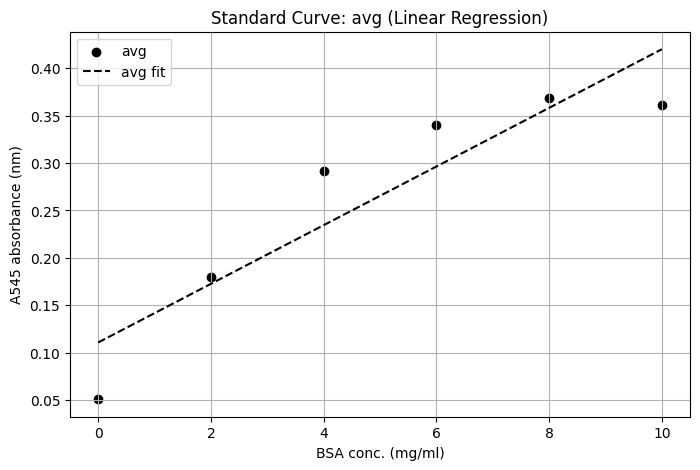

In [ ]:
# Show only avg linear regression

x = df.columns.astype(float)  # BSA concentrations (mg/ml)
y = df_merged.loc['avg'].values.astype(float)  # A545 absorbance (avg)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='black', label='avg')

# Linear regression for avg
coef = np.polyfit(x, y, 1)
y_fit = np.polyval(coef, x)
plt.plot(x, y_fit, color='black', linestyle='--', label='avg fit')

plt.xlabel('BSA conc. (mg/ml)')
plt.ylabel('A545 absorbance (nm)')
plt.title('Standard Curve: avg (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


R-squared: 0.8442


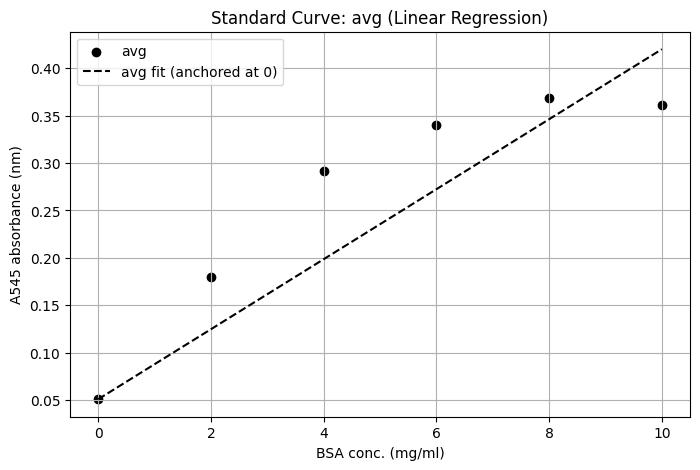

In [123]:
# Show only avg linear regression

x = df.columns.astype(float)  # BSA concentrations (mg/ml)
y = df_merged.loc['avg'].values.astype(float)  # A545 absorbance (avg)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='black', label='avg')

# Linear regression for avg
coef = np.polyfit(x, y, 1)
slope, intercept = coef
y_fit = np.polyval(coef, x)

# Calculate R-squared
ss_res = np.sum((y - y_fit) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.4f}")

# Make the fit line start at the real y value for x=0
x_fit = np.array([x[0], x[-1]])
y_fit_line = np.array([y[0], slope * x[-1] + intercept])

plt.plot(x_fit, y_fit_line, color='black', linestyle='--', label='avg fit (anchored at 0)')

plt.xlabel('BSA conc. (mg/ml)')
plt.ylabel('A545 absorbance (nm)')
plt.title('Standard Curve: avg (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
print("BSA conc for 0.102:", (0.102 - intercept) / slope)

BSA conc for 0.102: -0.2860370769783792


In [92]:
slope

0.030909523809523796

In [31]:
# Linear regression for avg
coef = np.polyfit(x, y, 1)
slope, intercept = coef
print(f"Equation for avg fit: y = {slope:.4f} * x + {intercept:.4f}")
def calc_A545(a545_value):
    # y = slope * x + intercept  =>  x = (y - intercept) / slope
    return (a545_value - intercept) / slope

def display_protein(a545_value):
    bsa_conc = calc_A545(a545_value)
    # If BSA concentration is negative, set to 0
    bsa_conc_display = bsa_conc if bsa_conc >= 0 else 0
    print(f'''
Equation for avg linear regression: y = {slope:.4f} * x + {intercept:.4f}
A545 value (nm): {a545_value}
BSA concentration (mg/ml): {bsa_conc_display:.4f} mg/ml
Protein (mg): {bsa_conc_display * 2:.4f} mg
          ''')

Equation for avg fit: y = 0.0309 * x + 0.1108


## after fix 

In [87]:
def a545_to_bsa(a545_value):
    """
    Convert A545 absorbance value to BSA concentration (mg/ml)
    using the linear regression equation from the avg standard curve.
    """
    # y = slope * x + intercept  =>  x = (y - intercept) / slope
    bsa_conc = (a545_value - intercept) / slope
    # If BSA concentration is negative, set to 0
    return bsa_conc 


In [88]:
def display_protein(a545_value):
    bsa_conc = a545_to_bsa(a545_value)
    # If BSA concentration is negative, set to 0
    bsa_conc_display = bsa_conc if bsa_conc >= 0 else 0
    print(f'''
Equation for avg linear regression: y = {slope:.4f} * x + {intercept:.4f}
A545 value (nm): {a545_value}
BSA concentration (mg/ml): {bsa_conc:.4f} mg/ml
Protein (mg): {bsa_conc * 2:.4f} mg
          ''')

In [89]:
display_protein(0.102
)


Equation for avg linear regression: y = 0.0309 * x + 0.1108
A545 value (nm): 0.102
BSA concentration (mg/ml): -0.2860 mg/ml
Protein (mg): -0.5721 mg
          


In [140]:
# Get data
x = df.columns.astype(float)
y = df_merged.loc['avg'].values.astype(float)

# Anchor the fit at (0, y0)
y0 = y[0]  # absorbance at BSA = 0
slope = np.sum(x * (y - y0)) / np.sum(x ** 2)
intercept = y0

def a545_to_bsa(a545_value):
    """
    Convert A545 absorbance value to BSA concentration (mg/ml)
    using the anchored linear regression (starts at BSA=0).
    """
    bsa_conc = (a545_value - intercept) / slope
    return bsa_conc if bsa_conc >= 0 else 0

def display_protein(a545_value):
    bsa_conc = a545_to_bsa(a545_value)
    # If BSA concentration is negative, set to 0
    bsa_conc_display = bsa_conc if bsa_conc >= 0 else 0
    print(f'''
Equation for avg linear regression: y = {slope:.4f} * x + {intercept:.4f}
A545 value (nm): {a545_value}
BSA concentration (mg/ml): {bsa_conc:.4f} mg/ml
concentration {bsa_conc:.4f}
protein {bsa_conc*10:.4f}
          ''')


In [142]:
display_protein(0.317)


Equation for avg linear regression: y = 0.0391 * x + 0.0510
A545 value (nm): 0.317
BSA concentration (mg/ml): 6.8083 mg/ml
concentration 6.8083
protein 68.0835
          
